In [5]:
using Flux, MLUtils;
x_dim = 10;
y_dim = 4;
num_samples = 3;
num_output_features = 7;

img = rand(Float32, x_dim, y_dim, num_samples)
model = Chain(MLUtils.flatten,
              LSTM(x_dim*y_dim => num_output_features))

size(model(img)) #(num_output_features, num_samples)

(7, 3)

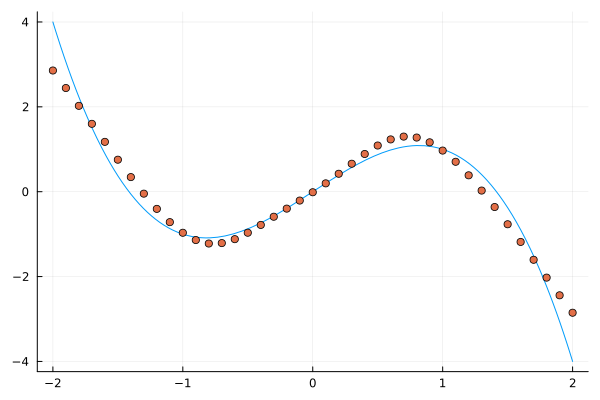

In [6]:
using Flux, Plots
data = [([x], 2x-x^3) for x in -2:0.1f0:2]

model = Chain(Dense(1 => 23, tanh), Dense(23 => 1, bias=false), only)

optim = Flux.setup(Adam(), model)
for epoch in 1:1000
  Flux.train!((m,x,y) -> (m(x) - y)^2, model, data, optim)
end

plot(x -> 2x-x^3, -2, 2, legend=false)
scatter!(x -> model([x]), -2:0.1f0:2)